In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from glob import glob

from utility_functions import read_survey_data

In [2]:
LATEX_MODEL_NAMES = {
    'PL2-DFR-SD': 'PL2-Terrier',
    'ltr-lgbm': 'LambdaMART-LightGBM',
    'ltr-xgboost': 'LambdaMART-XGBoost',
    'neur-doc-300': 'GDMTL'
}
LATEX_MODELS_ORDER = ['PL2-Terrier', 'GDMTL', 'LambdaMART-LightGBM', 'LambdaMART-XGBoost']

In [3]:
plt.rcParams.update(plt.rcParamsDefault)
paper_fmt = {
    "font.family": ["Linux Libertine O"],
    "font.serif": ["Linux Libertine O"],
    "font.sans-serif": "Linux Biolinum",
    'font.size': 12,
    'pdf.fonttype': 42,
    #     'figure.facecolor': (0.98, 0.98, 0.98),
    #     'figure.facecolor':'#212121',
    #     'text.color': '#23373b',
    #     'axes.labelcolor': 'white',
    #     'xtick.color': 'white',
    #     'ytick.color': 'white',
    #     'axes.titlecolor':'white',
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.figsize': (5, 2),
    'legend.borderaxespad': 0.5,
    'legend.fontsize': 'small',
    'legend.title_fontsize': 'small',
    #     'legend.facecolor':'white',
    #     "axes.labelpad": 20.0
    "axes.labelpad": 5.0,
    # 'axes.titlesize':38,
    #     'axes.labelsize':'medium'
}
thesis_fmt = {
    "ps.useafm": True,
    # "ps.usedistiller": "xpdf",
    "font.family": "serif",
    "font.serif": ['garamond', 'urw-garamond', 'Garamond 3 URW'],
    # "text.latex.preamble": r"\usepackage{mathdesign}",
    "text.latex.preamble": r"\usepackage{microtype}"
                           r"\usepackage{lmodern}"
                           r"\usepackage[scaled]{beramono}"
                           r"\usepackage[urw-garamond, uppercase=upright]{mathdesign}"
                           r"\usepackage{garamondx}"
                           r"\renewcommand{\ttdefault}{lmtt}"
                           r"\usepackage{pifont}"
                           r"\usepackage{setspace}"
                           r"\linespread{1.05}"
                           r"\DeclareMathAlphabet{\xcal}{OMS}{cmsy}{m}{n}",
    # "mathtext.default": 'it',
    # "mathtext.fontset": 'custom',
    # "mathtext.rm": 'Garamond 3 URW Italic',
    # "mathtext.it": 'Garamond 3 URW Italic',
    'text.usetex': True,
    # "font.sans-serif": "Linux Biolinum",
    'font.size': 11,
    # 'pdf.fonttype': 42,
    #     'figure.facecolor': (0.98, 0.98, 0.98),
    #     'figure.facecolor':'#212121',
    #     'text.color': '#23373b',
    #     'axes.labelcolor': 'white',
    #     'xtick.color': 'white',
    #     'ytick.color': 'white',
    #     'axes.titlecolor':'white',
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.figsize': (10, 5),
    'legend.borderaxespad': 0.5,
    'legend.fontsize': 'small',
    'legend.title_fontsize': 'small',
    #     'legend.facecolor':'white',
    #     "axes.labelpad": 20.0
    "axes.labelpad": 5.0,
    # 'axes.titlesize':38,
    #     'axes.labelsize':'medium'
}

plt.rcParams.update(thesis_fmt)

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  #
plt.close()

In [4]:
ranks_df_file = 'data/ranks_df_long.csv'
ratings_df_file = 'data/ratings_df_long.csv'
comb_df_file = 'data/comb_df.parquet.zstd'

ranks_df, rates_df = read_survey_data(ranks_df_file, ratings_df_file)
orig_comb_df = pd.read_parquet(comb_df_file).astype({'batch_order': int})
orig_comb_df

,method,topic,rid,query,value,wid,batch,duration,EndDate,query_mean,batch_order,qid,user_nDCG@10,user_query,topic_class
0,Ranking,213,12404386894,carpal tunnel syndrome,4,A39MKVROUZ1UWR,red,204,2022-02-14 14:23:14,1.911111,2,213-2264,0.221163,symptoms carpal tunnel,Understand
1,Ranking,213,12404386894,what is carpal tunnel syndrome,5,A39MKVROUZ1UWR,red,204,2022-02-14 14:23:14,1.933333,2,213-5606,0.221163,symptoms carpal tunnel,Understand
2,Ranking,213,12404386894,carpal tunnel syndrome wiki,3,A39MKVROUZ1UWR,red,204,2022-02-14 14:23:14,2.877778,2,213-5173,0.221163,symptoms carpal tunnel,Understand
3,Ranking,213,12404386894,carpal tunnel,2,A39MKVROUZ1UWR,red,204,2022-02-14 14:23:14,3.655556,2,213-7111,0.221163,symptoms carpal tunnel,Understand
4,Ranking,213,12404386894,cts syndrome,1,A39MKVROUZ1UWR,red,204,2022-02-14 14:23:14,4.622222,2,213-2326,0.221163,symptoms carpal tunnel,Understand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10355,Rating,297,976386207551,altitude sickness,3,A1YH2I4Y2SYAXJ,blue,328,2022-02-14 11:50:36,3.297619,3,297-3878,0.264538,mexico city altitude sickness prevention,Understand
10356,Rating,297,976386207551,mexico city altitude sickness prevention,5,A1YH2I4Y2SYAXJ,blue,328,2022-02-14 11:50:36,4.226190,3,297-5173,0.264538,mexico city altitude sickness prevention,Understand
10357,Rating,297,976386207551,how to overcome altitude sickness,4,A1YH2I4Y2SYAXJ,blue,328,2022-02-14 11:50:36,4.416667,3,297-7913,0.264538,mexico city altitude sickness prevention,Understand
10358,Rating,297,976386207551,treatment for altitude sickness,4,A1YH2I4Y2SYAXJ,blue,328,2022-02-14 11:50:36,4.523810,3,297-9743,0.264538,mexico city altitude sickness prevention,Understand


In [5]:
def remove_longest_sessions(_comb_df, p=0.05):
    # Dropping the longest 5% samples.
    q = 1 - p
    percentile = _comb_df['duration'].quantile(q=q)
    print(f'Dropping {(p) * 100:.1f}% of longest samples')
    print(_comb_df.loc[_comb_df["duration"] > percentile, 'method'].value_counts() / 20)
    _comb_df_ = _comb_df.loc[_comb_df["duration"] <= percentile]
    print(
        f'Total of {(len(_comb_df) - len(_comb_df_)) / 20} sessions longer than {percentile} sec (~{percentile // 60} minutes) will be dropped')

    return _comb_df_

def filter_unique_sessions(_comb_df):
    # Filtering sessions to remove duplicates
    ranking_duration = _comb_df.loc[_comb_df['method'] == 'Ranking'].groupby('rid')[
        ['duration', 'batch_order', 'method', 'wid', 'batch']].head(1)
    rating_duration = _comb_df.loc[_comb_df['method'] == 'Rating'].groupby('rid')[
        ['duration', 'batch_order', 'method', 'wid', 'batch']].head(1)
    comb_duration = pd.concat([ranking_duration, rating_duration])
    # Add duration in minutes and return
    return comb_duration.assign(dur_min=(comb_duration['duration'] / 60))


In [6]:
comb_duration_raw = filter_unique_sessions(orig_comb_df)

comb_df = remove_longest_sessions(orig_comb_df, 0.05)
comb_duration = filter_unique_sessions(comb_df)

Dropping 5.0% of longest samples
method
Ranking    15.0
Rating     10.0
Name: count, dtype: float64
Total of 25.0 sessions longer than 674.0 sec (~11.0 minutes) will be dropped


In [7]:
user_values_df = comb_df.groupby(['method', 'qid'])['value'].mean().reset_index().pivot(index='qid',
                                                                                        columns='method').droplevel(0,
                                                                                                                    axis=1)
user_values_df.head()

method,Ranking,Rating
qid,,
213-2264,4.103448,4.157143
213-2326,1.379310,2.285714
213-5173,3.149425,3.828571
213-5606,4.057471,4.085714
213-7111,2.310345,3.400000


In [8]:
trad_run_df = pd.read_csv('data/selected_runs/PL2-DFR-SD.ndcg@10', index_col=0, delim_whitespace=True, header=None,
                          names=['qid', 'nDCG@10'])
print(f'\nMean {trad_run_df.columns[0]}: {trad_run_df.mean()[0] : .3f}')
trad_run_df.head()


Mean nDCG@10:  0.218


,nDCG@10
qid,
213-2264,0.075295
213-2326,0.349312
213-5173,0.121913
213-5606,0.075295
213-7111,0.114385


In [9]:
rbp_results = glob('data/selected_runs/*rbp*')
_results = {}
_residuals = {}
for result in sorted(rbp_results):
    metric = result.split('.', 1)[-1]
    # residual =
    method = result.split('.', 1)[-2].split('/')[-1]
    # _results.append(pd.read_csv(result, delim_whitespace=True, header=None, index_col=0, names=['qid', metric]))
    # _results[method, metric] = pd.read_csv(result, delim_whitespace=True, header=None, names=['qid', metric, 'res'],
    #                                        index_col='qid').drop('res', axis=1)
    _results[method, metric] = pd.read_csv(result, delim_whitespace=True, header=None,
                                           names=['qid', metric, f'{metric}-res'],
                                           index_col='qid')
    # _residuals[method, metric] = pd.read_csv(result, delim_whitespace=True, header=None, names=['qid', metric, 'res'],
    #                                        index_col='qid').drop('res', axis=1)# TODO: create a df of residuals
rbp_df = pd.concat(_results, axis=1).droplevel(1, axis=1)
rbp_df

PL2-DFR-SD                                                        \
            rbp@0.5 rbp@0.5-res rbp@0.8 rbp@0.8-res rbp@0.85 rbp@0.85-res   
qid                                                                         
213-7111     0.9929      0.0000  0.8696      0.0006   0.8221       0.0034   
213-2264     0.3633      0.0000  0.5587      0.0003   0.5930       0.0020   
213-5173     0.1826      0.0000  0.4567      0.0002   0.5158       0.0015   
213-2326     0.7179      0.0005  0.6804      0.0461   0.6575       0.0877   
213-5606     0.3633      0.0000  0.5587      0.0003   0.5930       0.0020   
223-6720     0.1053      0.0000  0.3662      0.0120   0.4196       0.0293   
223-8425     0.7451      0.0000  0.7507      0.0029   0.7421       0.0116   
223-9430     0.2741      0.0000  0.3382      0.0169   0.3559       0.0413   
223-9981     0.7458      0.0000  0.7607      0.0034   0.7520       0.0132   
223-9467     0.1348      0.0007  0.2158      0.0553   0.2120       0.0993   
234-4926     0.0928      0.0000  0.3982      0.0017   0.4827       0.0061   
234-1823     0.1090      0.0000  0.4104      0.0013   0.4835       0.0055   
234-3339     0.0625      0.0000  0.3960      0.0024   0.4841       0.0103   
234-1188     0.2813      0.1279  0.2434      0.2279   0.2100       0.2568   
234-7913     0.0615      0.0000  0.3666      0.0009   0.4486       0.0040   
238-3199     0.0020      0.0002  0.0404      0.0220   0.0562       0.0424   
238-7061     0.0020      0.0002  0.0404      0.0220   0.0562       0.0424   
238-1870     0.6578      0.0000  0.4859      0.0003   0.4549       0.0020   
238-5526     0.9849      0.0000  0.7593      0.0041   0.6524       0.0110   
238-8725     0.8344      0.0000  0.6454      0.0035   0.5904       0.0119   
244-5048     0.1875      0.0000  0.3774      0.0000   0.3954       0.0004   
244-1606     0.0039      0.0000  0.0431      0.0001   0.0530       0.0009   
244-1723     0.0039      0.0000  0.0431      0.0001   0.0530       0.0009   
244-9854     0.0166      0.0000  0.0947      0.0000   0.1100       0.0001   
244-6987     0.0000      0.0000  0.0023      0.0056   0.0077       0.0148   
253-6283     0.2070      0.0000  0.3501      0.0017   0.3413       0.0066   
253-3763     0.9818      0.0000  0.8365      0.0059   0.7735       0.0171   
253-1388     0.0000      0.0003  0.0095      0.0284   0.0186       0.0540   
253-1872     0.0000      0.0006  0.0000      0.0595   0.0000       0.1114   
253-3467     0.9793      0.0000  0.8213      0.0082   0.7593       0.0217   
259-9412     0.8592      0.0000  0.7523      0.0253   0.7100       0.0648   
259-3561     0.8955      0.0000  0.6610      0.0020   0.6139       0.0059   
259-8646     0.9712      0.0001  0.7344      0.0478   0.6398       0.1068   
259-6786     0.9060      0.0000  0.7854      0.0014   0.7656       0.0058   
259-9374     0.0046      0.0004  0.0730      0.0526   0.0935       0.0962   
261-6263     0.8556      0.0005  0.6563      0.0282   0.5838       0.0499   
261-5906     0.9137      0.0625  0.7160      0.1039   0.6663       0.0991   
261-2222     0.9971      0.0000  0.9252      0.0005   0.8852       0.0026   
261-4857     0.6872      0.0000  0.7029      0.0019   0.7130       0.0053   
261-3964     0.9911      0.0078  0.8837      0.0559   0.8297       0.0669   
266-7317     0.0450      0.0001  0.2236      0.0508   0.2452       0.1097   
266-5955     0.9833      0.0000  0.8788      0.0066   0.8393       0.0196   
266-5597     0.7180      0.0005  0.6959      0.0360   0.6835       0.0668   
266-8538     0.7914      0.0000  0.5807      0.0022   0.5526       0.0070   
266-9035     0.9942      0.0003  0.8439      0.0315   0.7647       0.0615   
283-2264     0.6329      0.0000  0.3946      0.0000   0.3387       0.0000   
283-7317     0.6329      0.0000  0.3946      0.0000   0.3387       0.0000   
283-1292     0.6602      0.0000  0.4536      0.0000   0.3905       0.0000   
283-8091     0.0000      0.0010  0.0000      0.1040   0.0000       0.1874   
283-2

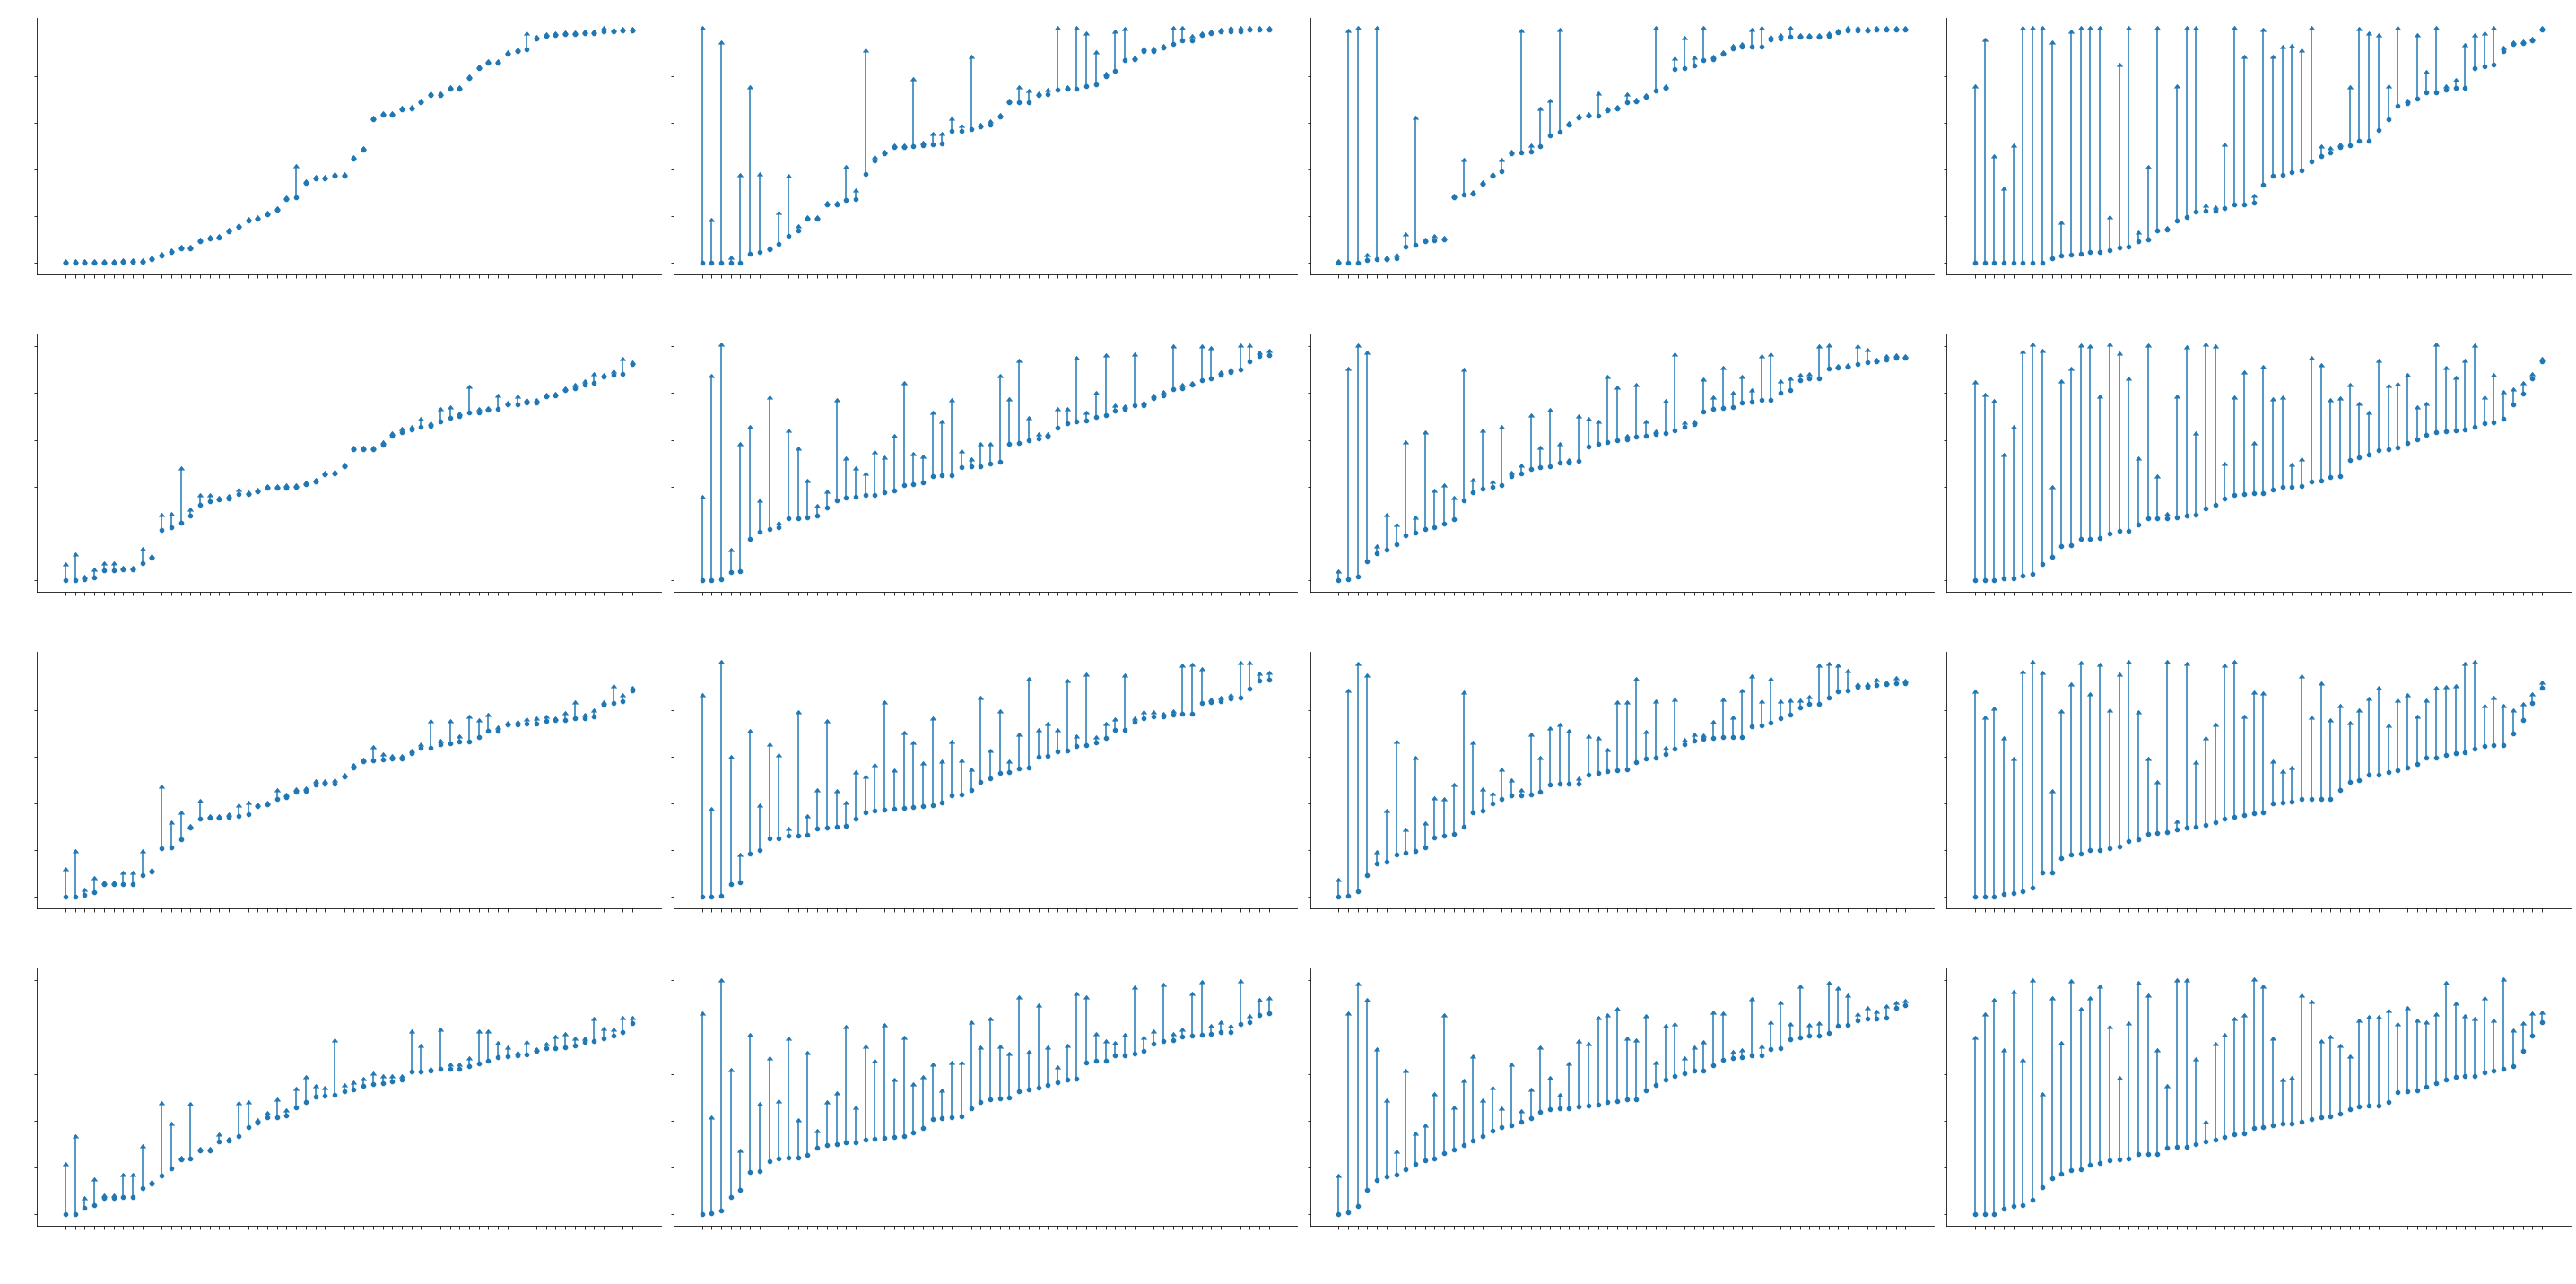

In [10]:
_df = rbp_df.swaplevel(axis='columns').stack().reset_index()
_df = pd.concat([_df.melt(id_vars=['qid', 'level_1'], value_vars=_df.columns[2::2]),
                 _df.melt(id_vars=['qid', 'level_1'], value_vars=_df.columns[3::2], value_name='res')['res']], axis=1)

_df = _df.sort_values(by=['variable', 'level_1', 'value'])
g = sns.relplot(data=_df, x='qid', y='value', col='level_1', row='variable', height=5, aspect=2,
                facet_kws=dict(sharex=False))
g.map_dataframe(plt.errorbar, x='qid', y='value', yerr='res', data=_df, lolims=True, fmt='none')

for ax in g.axes.flat:
    # ax.minorticks_on()
    # ax.tick_params(axis='y', which='minor', left=True)
    # ax.tick_params(axis='y', which='major', left=True)
    # ax.tick_params(axis='x', which='minor', bottom=False, labelbottom=False)
    ax.tick_params(axis='x', which='major', bottom=True, labelbottom=True, labelrotation=90)

# metrics = _df['variable'].unique()
# systems = _df['level_1'].unique()
# for metric in metrics:
#     plt.close()
#     for system in systems:
#         plt.figure(figsize=(12, 2.25))
#         plt.title(f'{metric} {system}')
#         df = _df[(_df['variable'] == metric) & (_df['level_1'] == system)]
#         sns.scatterplot(data=df, x='qid', y='value')
#         plt.errorbar(x='qid', y='value', yerr='res', data=df, lolims=True, fmt='o')
#         plt.xticks(rotation=90)
#     plt.show()
# for metric in metrics:
plt.tight_layout()
plt.savefig('plots/full_rbp_results.pdf', bbox_inches='tight')
plt.show()

In [11]:
# _df
rbp_df.swaplevel(axis='columns')[['rbp@0.8', 'rbp@0.8-res']].stack().reset_index()

,qid,level_1,rbp@0.8,rbp@0.8-res
0,213-7111,PL2-DFR-SD,0.8696,0.0006
1,213-7111,ltr-lgbm,0.4971,0.0764
2,213-7111,ltr-xgboost,0.7712,0.1818
3,213-7111,neur-doc-300,0.2770,0.7147
4,213-2264,PL2-DFR-SD,0.5587,0.0003
...,...,...,...,...
235,297-5173,neur-doc-300,0.4439,0.3281
236,297-9743,PL2-DFR-SD,0.7176,0.0058
237,297-9743,ltr-lgbm,0.7914,0.0075
238,297-9743,ltr-xgboost,0.8564,0.0145


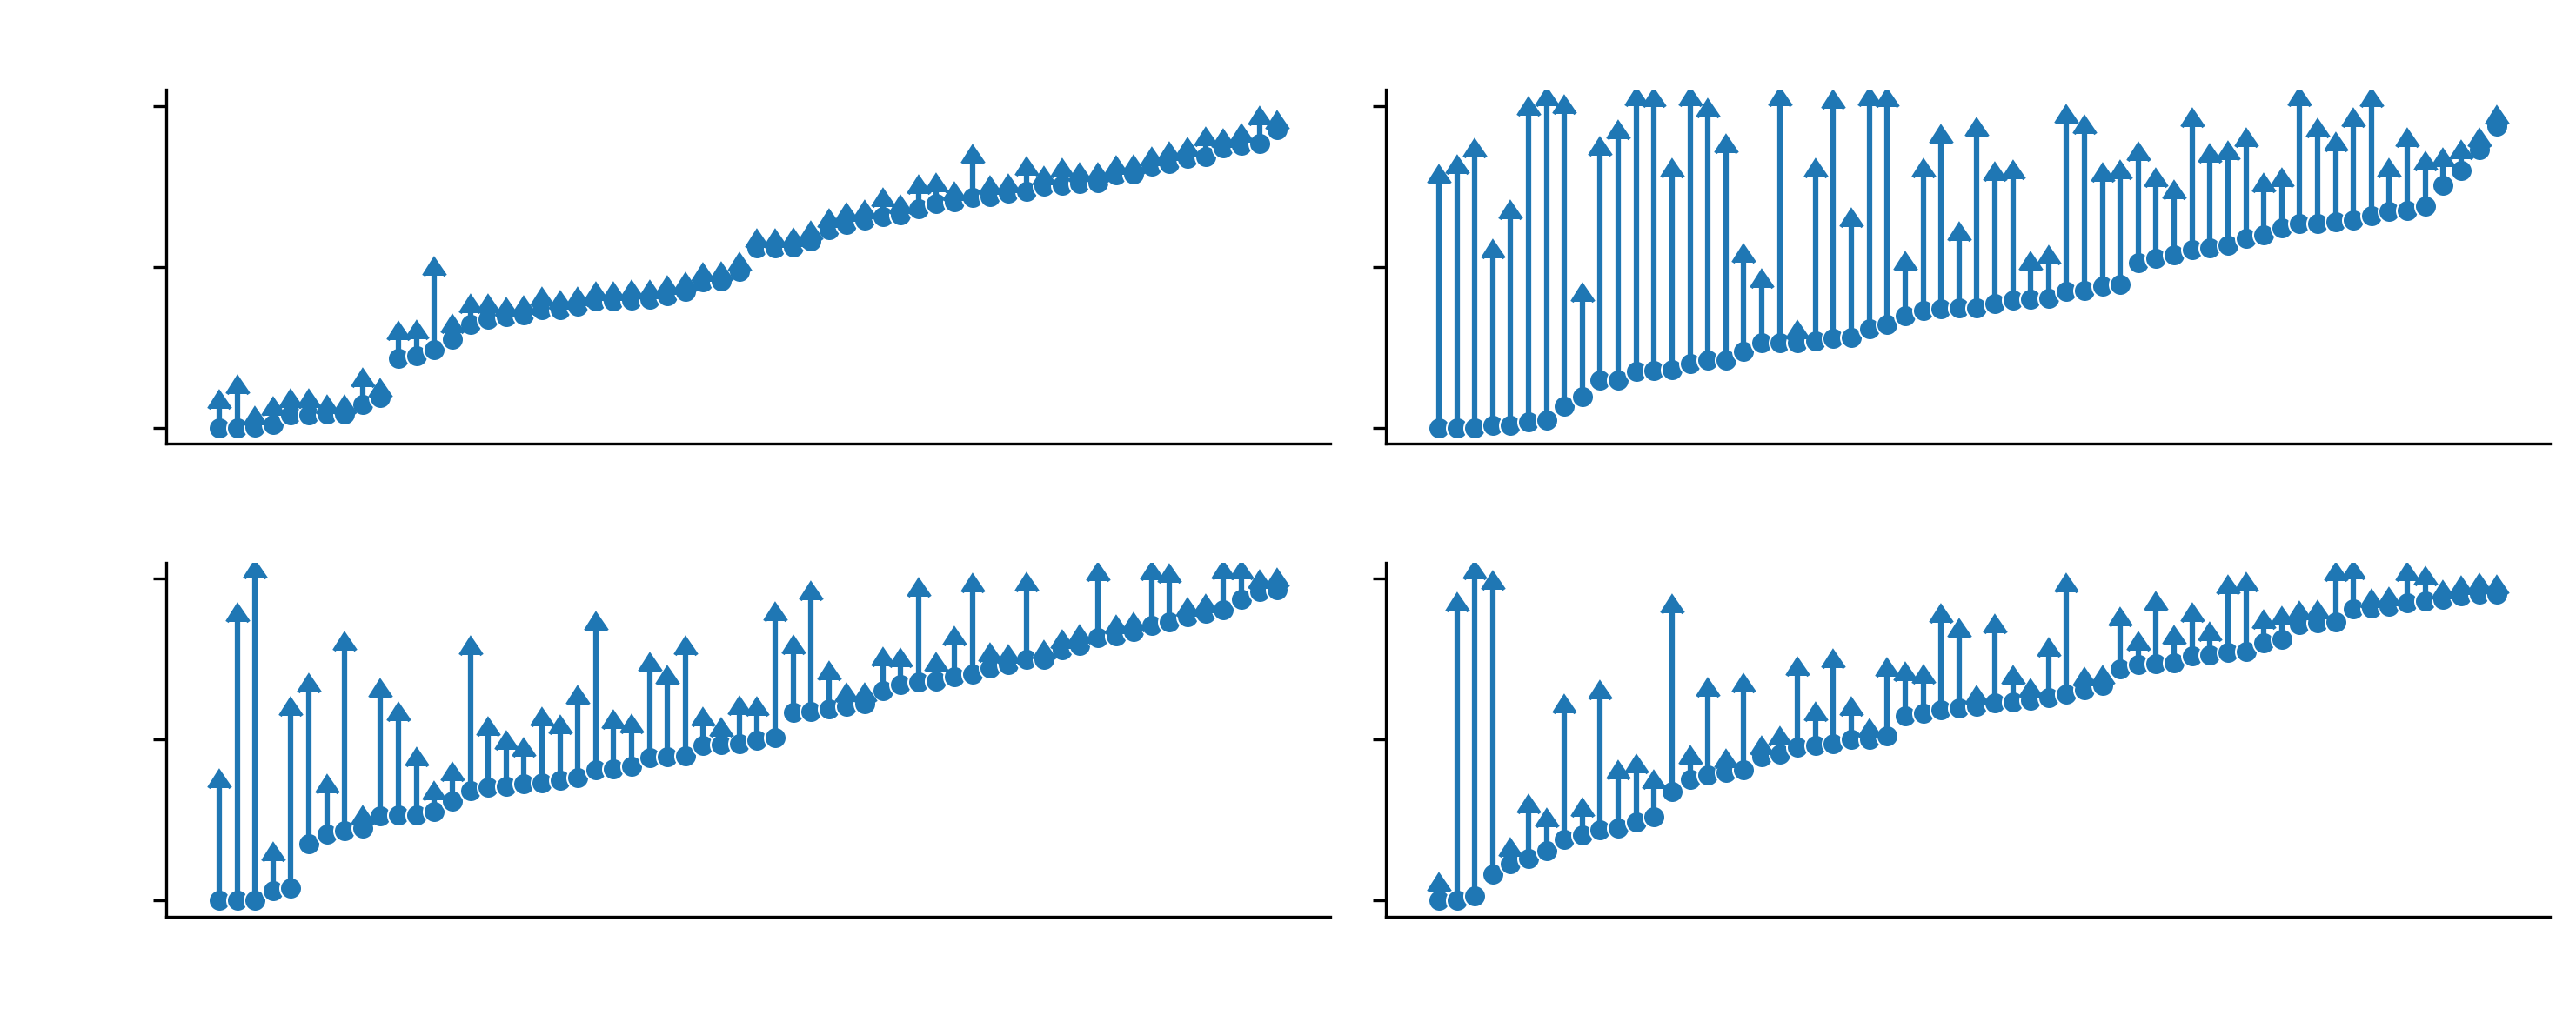

In [39]:
plt.rcParams.update(thesis_fmt)

_df_ = rbp_df.swaplevel(axis='columns')[['rbp@0.8', 'rbp@0.8-res']].stack().reset_index().sort_values(
    by=['level_1', 'rbp@0.8', 'rbp@0.8-res'], ascending=[True, True, True]).replace(LATEX_MODEL_NAMES)

g = sns.relplot(data=_df_, x='qid', y='rbp@0.8', col='level_1', height=2, aspect=2.5, facet_kws=dict(sharex=False),
                col_wrap=2, col_order=LATEX_MODELS_ORDER)
g.map_dataframe(plt.errorbar, x='qid', y='rbp@0.8', yerr='rbp@0.8-res', data=_df_, lolims=True, fmt='none')

g.set_titles('{col_name}', size='x-large')
g.set_ylabels('RBP(0.8)', size='large')
g.set_xlabels('Queries', size='large')

for ax in g.axes.flat:
    # ax.minorticks_on()
    # ax.tick_params(axis='y', which='minor', left=True)
    # ax.tick_params(axis='y', which='major', left=True)
    ax.tick_params(axis='x', which='major', bottom=False, labelbottom=False)
    # ax.tick_params(axis='x', which='major', bottom=True, labelbottom=True, labelrotation=90)

plt.tight_layout()
plt.savefig('plots/rbp_results.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [13]:
def testing(x):
    if x['metric'].endswith('-res'):
        return x
    else:
        # print(x.name)
        return x + _df.loc[_df['metric'] == x['metric'] + '-res'].loc[x.name]


In [14]:
_df = rbp_df.stack()
_df.index.names = ['qid', 'metric']
_df = _df.reset_index('metric')
# _df.apply(lambda x: x if x['metric'].endswith('-res') else x + _df.loc[_df['metric'] == f'{x}-res'], axis=1)
_df.apply(testing, axis=1)


,metric,PL2-DFR-SD,ltr-lgbm,ltr-xgboost,neur-doc-300
qid,,,,,
213-7111,rbp@0.5rbp@0.5-res,0.9929,0.5860,0.9989,1.0000
213-7111,rbp@0.5-res,0.0000,0.0030,0.1289,0.9542
213-7111,rbp@0.8rbp@0.8-res,0.8702,0.5735,0.9530,0.9917
213-7111,rbp@0.8-res,0.0006,0.0764,0.1818,0.7147
213-7111,rbp@0.85rbp@0.85-res,0.8255,0.6188,0.9283,0.9828
...,...,...,...,...,...
297-9743,rbp@0.8-res,0.0058,0.0075,0.0145,0.1320
297-9743,rbp@0.85rbp@0.85-res,0.7585,0.7853,0.8357,0.7667
297-9743,rbp@0.85-res,0.0152,0.0196,0.0241,0.1983


In [15]:
ndcg_results = glob('data/selected_runs/*ndcg*')
_results = {}
for result in sorted(ndcg_results):
    metric = result.split('.', 1)[-1]
    method = result.split('.', 1)[-2].split('/')[-1]
    # _results.append(pd.read_csv(result, delim_whitespace=True, header=None, index_col=0, names=['qid', metric]))
    _results[method, metric] = pd.read_csv(result, delim_whitespace=True, header=None, names=['qid', metric],
                                           index_col='qid')
ndcg_df = pd.concat(_results, axis=1).droplevel(2, axis=1)
ndcg_df

PL2-DFR-SD                                          ltr-lgbm  \
            ndcg@10   ndcg@15   ndcg@20    ndcg@3    ndcg@5   ndcg@10   
qid                                                                     
213-2264   0.075295  0.090485  0.084894  0.042297  0.070180  0.239475   
213-2326   0.349312  0.295295  0.255162  0.435759  0.461003  0.125673   
213-5173   0.121913  0.126622  0.119944  0.033520  0.042969  0.267757   
213-5606   0.075295  0.090485  0.084894  0.042297  0.070180  0.352363   
213-7111   0.114385  0.139983  0.131150  0.142857  0.142857  0.088501   
223-6720   0.201439  0.291578  0.284450  0.000000  0.247731  0.398389   
223-8425   0.346546  0.339503  0.364572  0.370912  0.352357  0.240986   
223-9430   0.049922  0.133795  0.164813  0.027532  0.022030  0.226692   
223-9467   0.103866  0.094482  0.087416  0.152728  0.122210  0.213037   
223-9981   0.356010  0.341936  0.366902  0.370912  0.355418  0.240986   
234-1188   0.020834  0.017525  0.015344  0.019739  0.027006  0.000000   
234-1823   0.110706  0.151296  0.204203  0.000000  0.042223  0.474163   
234-3339   0.192166  0.238980  0.241623  0.000000  0.030795  0.243266   
234-4926   0.129187  0.212047  0.239485  0.000000  0.011428  0.463437   
234-7913   0.192094  0.228522  0.235355  0.000000  0.071855  0.245444   
238-1870   0.263513  0.301393  0.343204  0.234639  0.300785  0.324876   
238-3199   0.011212  0.009773  0.016521  0.000000  0.000000  0.182640   
238-5526   0.490367  0.490821  0.465605  0.746216  0.620654  0.439192   
238-7061   0.011212  0.009773  0.016521  0.000000  0.000000  0.438473   
238-8725   0.365688  0.378529  0.359082  0.363122  0.325038  0.439192   
244-1606   0.013212  0.011543  0.011065  0.000000  0.000000  0.000000   
244-1723   0.013212  0.011543  0.011065  0.000000  0.000000  0.271864   
244-5048   0.064296  0.085136  0.131317  0.033520  0.048747  0.184406   
244-6987   0.000000  0.000000  0.000000  0.000000  0.000000  0.038674   
244-9854   0.056861  0.049677  0.047622  0.000000  0.000000  0.264500   
253-1388   0.000000  0.006991  0.006362  0.000000  0.000000  0.084739   
253-1872   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
253-3467   0.620790  0.574673  0.571463  1.000000  0.799824  0.502274   
253-3763   0.633996  0.578618  0.587786  1.000000  0.804071  0.503982   
253-6283   0.307865  0.273828  0.261202  0.234639  0.315648  0.109962   
259-3561   0.377530  0.400842  0.429945  0.545096  0.393955  0.547837   
259-6786   0.624413  0.628890  0.658507  0.830810  0.600449  0.651775   
259-8646   0.134128  0.126865  0.121515  0.142857  0.184591  0.100962   
259-9374   0.019725  0.017471  0.022023  0.000000  0.000000  0.009822   
259-9412   0.159759  0.164603  0.155626  0.109337  0.118631  0.087751   
261-2222   0.514984  0.541980  0.527898  0.696613  0.585961  0.636943   
261-3964   0.360681  0.380979  0.489443  0.311170  0.307614  0.451596   
261-4857   0.305223  0.363832  0.366579  0.196365  0.251682  0.375293   
261-5906   0.207764  0.223064  0.207455  0.136623  0.149847  0.137682   
261-6263   0.094559  0.096837  0.103574  0.071168  0.085493  0.089966   
266-5597   0.255818  0.218265  0.227377  0.109092  0.192559  0.280708   
266-5955   0.313540  0.349011  0.327323  0.258177  0.292225  0.255760   
266-7317   0.033581  0.032620  0.027920  0.000000  0.013508  0.036786   
266-8538   0.183137  0.192621  0.210027  0.126232  0.141531  0.468871   
266-9035   0.321085  0.265775  0.268176  0.366233  0.348614  0.274031   
283-1292   0.181633  0.169001  0.159103  0.240551  0.224739  0.105283   
283-2264   0.160705  0.163390  0.153819  0.240551  0.194623  0.211222   
283-2364   0.153727  0.143036  0.134658  0.182125  0.210996  0.211119   
283-7317   0.160705  0.163390  0.153819  0.240551  0.194623  0.247501   
283-8091   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
286-3347   0.155850  0.144642  0.169245  0.100560  0.149775  0.445769   
286-5878   0.544897  0.511264  0.507331  0.597761  0.578086  0.6846

In [16]:
for i in ['ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@20']:
    print(i)
    print(rbp_df['PL2-DFR-SD'].corrwith(ndcg_df['PL2-DFR-SD'][i]).nlargest(2))

ndcg@3
rbp@0.5    0.733380
rbp@0.8    0.665708
dtype: float64
ndcg@5
rbp@0.5    0.747528
rbp@0.8    0.737645
dtype: float64
ndcg@10
rbp@0.8     0.783820
rbp@0.85    0.769856
dtype: float64
ndcg@15
rbp@0.8     0.786241
rbp@0.85    0.785172
dtype: float64
ndcg@20
rbp@0.85    0.778126
rbp@0.8     0.774668
dtype: float64


In [17]:
ndcg_df.swaplevel(axis='columns')['ndcg@10'].mean()
# rbp_df.swaplevel(axis='columns')['rbp@0.8'].mean()

PL2-DFR-SD      0.217718
ltr-lgbm        0.281092
ltr-xgboost     0.286195
neur-doc-300    0.228809
dtype: float64

In [18]:
neur_run_df = pd.read_table('data/selected_runs/neur-doc-300.ndcg@10', index_col=0, delim_whitespace=True, header=None,
                            names=['qid', 'nDCG@10'])
print(f'\nMean {neur_run_df.columns[0]}: {neur_run_df.mean()[0] : .3f}')
neur_run_df


Mean nDCG@10:  0.229


,nDCG@10
qid,
213-2264,0.126230
213-2326,0.000000
213-5173,0.019837
213-5606,0.196699
213-7111,0.168005
223-6720,0.170566
223-8425,0.234025
223-9430,0.068338
223-9467,0.000000


In [19]:
ltr_run_df = pd.read_csv('data/selected_runs/ltr-lgbm.ndcg@10', index_col=0, delim_whitespace=True, header=None,
                         names=['qid', 'nDCG@10'])
print(f'\nMean {ltr_run_df.columns[0]}: {ltr_run_df.mean()[0] : .3f}')
ltr_run_df


Mean nDCG@10:  0.281


,nDCG@10
qid,
213-2264,0.239475
213-2326,0.125673
213-5173,0.267757
213-5606,0.352363
213-7111,0.088501
223-6720,0.398389
223-8425,0.240986
223-9430,0.226692
223-9467,0.213037


In [20]:
ltr_faml_run_df = pd.read_csv('data/selected_runs/ltr-xgboost.ndcg@10', index_col=0, delim_whitespace=True, header=None,
                              names=['qid', 'nDCG@10'])
print(f'\nMean {ltr_faml_run_df.columns[0]}: {ltr_faml_run_df.mean()[0] : .3f}')
ltr_faml_run_df


Mean nDCG@10:  0.286


,nDCG@10
qid,
213-2264,0.275210
213-2326,0.112206
213-5173,0.226749
213-5606,0.327789
213-7111,0.171012
223-6720,0.290805
223-8425,0.367422
223-9430,0.129685
223-9467,0.258432


In [21]:
comb_df = comb_df.assign(trad_ndcg=comb_df['qid'].map(trad_run_df['nDCG@10']),
                         neur_ndcg=comb_df['qid'].map(neur_run_df['nDCG@10']),
                         ltr_ndcg=comb_df['qid'].map(ltr_run_df['nDCG@10']))
comb_df.head()

,method,topic,rid,query,value,wid,batch,duration,EndDate,query_mean,batch_order,qid,user_nDCG@10,user_query,topic_class,trad_ndcg,neur_ndcg,ltr_ndcg
0,Ranking,213,12404386894,carpal tunnel syndrome,4,A39MKVROUZ1UWR,red,204,2022-02-14 14:23:14,1.911111,2,213-2264,0.221163,symptoms carpal tunnel,Understand,0.075295,0.126230,0.239475
1,Ranking,213,12404386894,what is carpal tunnel syndrome,5,A39MKVROUZ1UWR,red,204,2022-02-14 14:23:14,1.933333,2,213-5606,0.221163,symptoms carpal tunnel,Understand,0.075295,0.196699,0.352363
2,Ranking,213,12404386894,carpal tunnel syndrome wiki,3,A39MKVROUZ1UWR,red,204,2022-02-14 14:23:14,2.877778,2,213-5173,0.221163,symptoms carpal tunnel,Understand,0.121913,0.019837,0.267757
3,Ranking,213,12404386894,carpal tunnel,2,A39MKVROUZ1UWR,red,204,2022-02-14 14:23:14,3.655556,2,213-7111,0.221163,symptoms carpal tunnel,Understand,0.114385,0.168005,0.088501
4,Ranking,213,12404386894,cts syndrome,1,A39MKVROUZ1UWR,red,204,2022-02-14 14:23:14,4.622222,2,213-2326,0.221163,symptoms carpal tunnel,Understand,0.349312,0.000000,0.125673


In [22]:
qdf = pd.read_csv('data/QueriesSurvey.csv', sep=',', header=None, names=['qid', 'query'], index_col='qid').applymap(
    str.strip)
qdf.index = qdf.index.str.strip()
# qdf = qdf.merge(ndcg_df, left_index=True, right_index=True)
qdf['topic'] = qdf.index.str.split('-').str[0]
qdf = qdf.loc[~qdf.index.str.endswith('-0')]
qdf.shape

(60, 2)

In [23]:
evals_df = qdf.merge(pd.concat(
    [trad_run_df.rename(columns='Trad-{}'.format), ltr_run_df.rename(columns='LTR-{}'.format),
     ltr_faml_run_df.rename(columns='LTR-AutoTune-{}'.format), neur_run_df.rename(columns='Neur-{}'.format)], axis=1),
    left_index=True, right_index=True)
evals_df = evals_df.merge(user_values_df, left_index=True, right_index=True)
evals_df.head()

,query,topic,Trad-nDCG@10,LTR-nDCG@10,LTR-AutoTune-nDCG@10,Neur-nDCG@10,Ranking,Rating
qid,,,,,,,,
261-2222,sore throat home remedy,261,0.514984,0.636943,0.573677,0.559060,4.445783,4.848101
261-5906,sore throat,261,0.207764,0.137682,0.424297,0.034596,1.578313,2.518987
261-6263,home care cough remedy,261,0.094559,0.089966,0.037361,0.055114,2.024096,3.303797
261-3964,what can i use to cure a sore throat,261,0.360681,0.451596,0.537469,0.547701,2.915663,4.050633
261-4857,what are some homemade remedy for a sore throat,261,0.305223,0.375293,0.508908,0.337458,4.036145,4.645570


In [24]:
import os

run_scores_df = []
run_files = glob('data/selected_runs/*.run')
col_names = ['qid', 'iteration', 'docNo', 'rank', 'docScore', 'method']
for run in run_files:
    with open(run, 'r') as f:
        if 'qid' in f.readline():
            header = 0
        else:
            header = None
    _df = pd.read_table(run, delim_whitespace=True, header=header, names=col_names).assign(
        file=os.path.basename(run).rsplit('.', 1)[0].replace('.', '-').strip('-survey') + '-StD')
    run_scores_df.append(_df.loc[~_df['qid'].str.endswith('-0')])

In [25]:
runs_df = pd.concat(run_scores_df)
std_qpp = runs_df.groupby(['file', 'qid'])['docScore'].std().reset_index().pivot(index='qid', columns='file',
                                                                                 values='docScore')
std_qpp

file,PL2-DFR-SD-StD,ltr-lgbm-StD,ltr-xgboost-StD,neur-doc-300-StD
qid,,,,
213-2264,4.173837,1.588302,1.305138,3.216823
213-2326,2.154905,0.944743,0.939231,3.415546
213-5173,4.183369,1.603207,1.456658,2.421850
213-5606,4.173837,1.622267,1.428003,2.909083
213-7111,2.853214,1.319421,1.089273,3.674522
223-6720,1.429407,1.005888,0.855412,3.175118
223-8425,2.331687,1.059247,0.950492,2.593625
223-9430,1.990496,0.962100,0.776882,2.396911
223-9467,1.671697,0.822936,0.846306,2.816740


In [26]:
ndcg_evals_df = qdf.merge(ndcg_df.swaplevel(axis=1)['ndcg@10'], left_index=True, right_index=True).merge(user_values_df,
                                                                                                         left_index=True,
                                                                                                         right_index=True)
rbp_evals_df = qdf.merge(rbp_df.swaplevel(axis=1)['rbp@0.8'], left_index=True, right_index=True).merge(user_values_df,
                                                                                                       left_index=True,
                                                                                                       right_index=True)
rbp_res_evals_df = qdf.merge(rbp_df.swaplevel(axis=1)['rbp@0.8-res'], left_index=True, right_index=True).merge(
    user_values_df,
    left_index=True,
    right_index=True)
ndcg_evals_df

,query,topic,PL2-DFR-SD,ltr-lgbm,ltr-xgboost,neur-doc-300,Ranking,Rating
qid,,,,,,,,
261-2222,sore throat home remedy,261,0.514984,0.636943,0.573677,0.559060,4.445783,4.848101
261-5906,sore throat,261,0.207764,0.137682,0.424297,0.034596,1.578313,2.518987
261-6263,home care cough remedy,261,0.094559,0.089966,0.037361,0.055114,2.024096,3.303797
261-3964,what can i use to cure a sore throat,261,0.360681,0.451596,0.537469,0.547701,2.915663,4.050633
261-4857,what are some homemade remedy for a sore throat,261,0.305223,0.375293,0.508908,0.337458,4.036145,4.645570
253-3763,tooth abscess treatment,253,0.633996,0.503982,0.589900,0.299973,4.287356,4.757143
253-6283,abscess treatment,253,0.307865,0.109962,0.106952,0.051279,2.620690,3.528571
253-3467,treatment for tooth abscess,253,0.620790,0.502274,0.583204,0.241045,4.275862,4.757143
253-1388,tooth pain treatment,253,0.000000,0.084739,0.049325,0.143271,2.310345,3.242857


In [27]:
# Print latex table

print(pd.DataFrame(
    {'NDCG@10': ndcg_evals_df.mean(numeric_only=True), 'RBP(0.8)': rbp_evals_df.mean(numeric_only=True),
     'RBP(0.8)-Res': rbp_res_evals_df.mean(numeric_only=True)}).loc[
    ['PL2-DFR-SD', 'ltr-lgbm', 'ltr-xgboost', 'neur-doc-300']].rename(LATEX_MODEL_NAMES).to_latex(
    float_format='%.3f', escape=False))

\begin{tabular}{lrrr}
\toprule
 & NDCG@10 & RBP(0.8) & RBP(0.8)-Res \\
\midrule
PL2-Terrier & 0.218 & 0.492 & 0.019 \\
LambdaMART-LightGBM & 0.281 & 0.519 & 0.176 \\
LambdaMART-XGBoost & 0.286 & 0.559 & 0.150 \\
GDMTL & 0.229 & 0.383 & 0.421 \\
\bottomrule
\end{tabular}


In [28]:
plt.rcParams.update(plt.rcParamsDefault)
paper_fmt = {
    "font.family": ["Linux Libertine O"],
    "font.serif": ["Linux Libertine O"],
    "font.sans-serif": "Linux Biolinum",
    'font.size': 12,
    'pdf.fonttype': 42,
    #     'figure.facecolor': (0.98, 0.98, 0.98),
    #     'figure.facecolor':'#212121',
    #     'text.color': '#23373b',
    #     'axes.labelcolor': 'white',
    #     'xtick.color': 'white',
    #     'ytick.color': 'white',
    #     'axes.titlecolor':'white',
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.figsize': (5, 5),
    'legend.borderaxespad': 0.5,
    'legend.fontsize': 'small',
    'legend.title_fontsize': 'small',
    #     'legend.facecolor':'white',
    #     "axes.labelpad": 20.0
    "axes.labelpad": 5.0,
    # 'axes.titlesize':38,
    #     'axes.labelsize':'medium'
}
plt.rcParams.update(thesis_fmt)

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  #
plt.close()

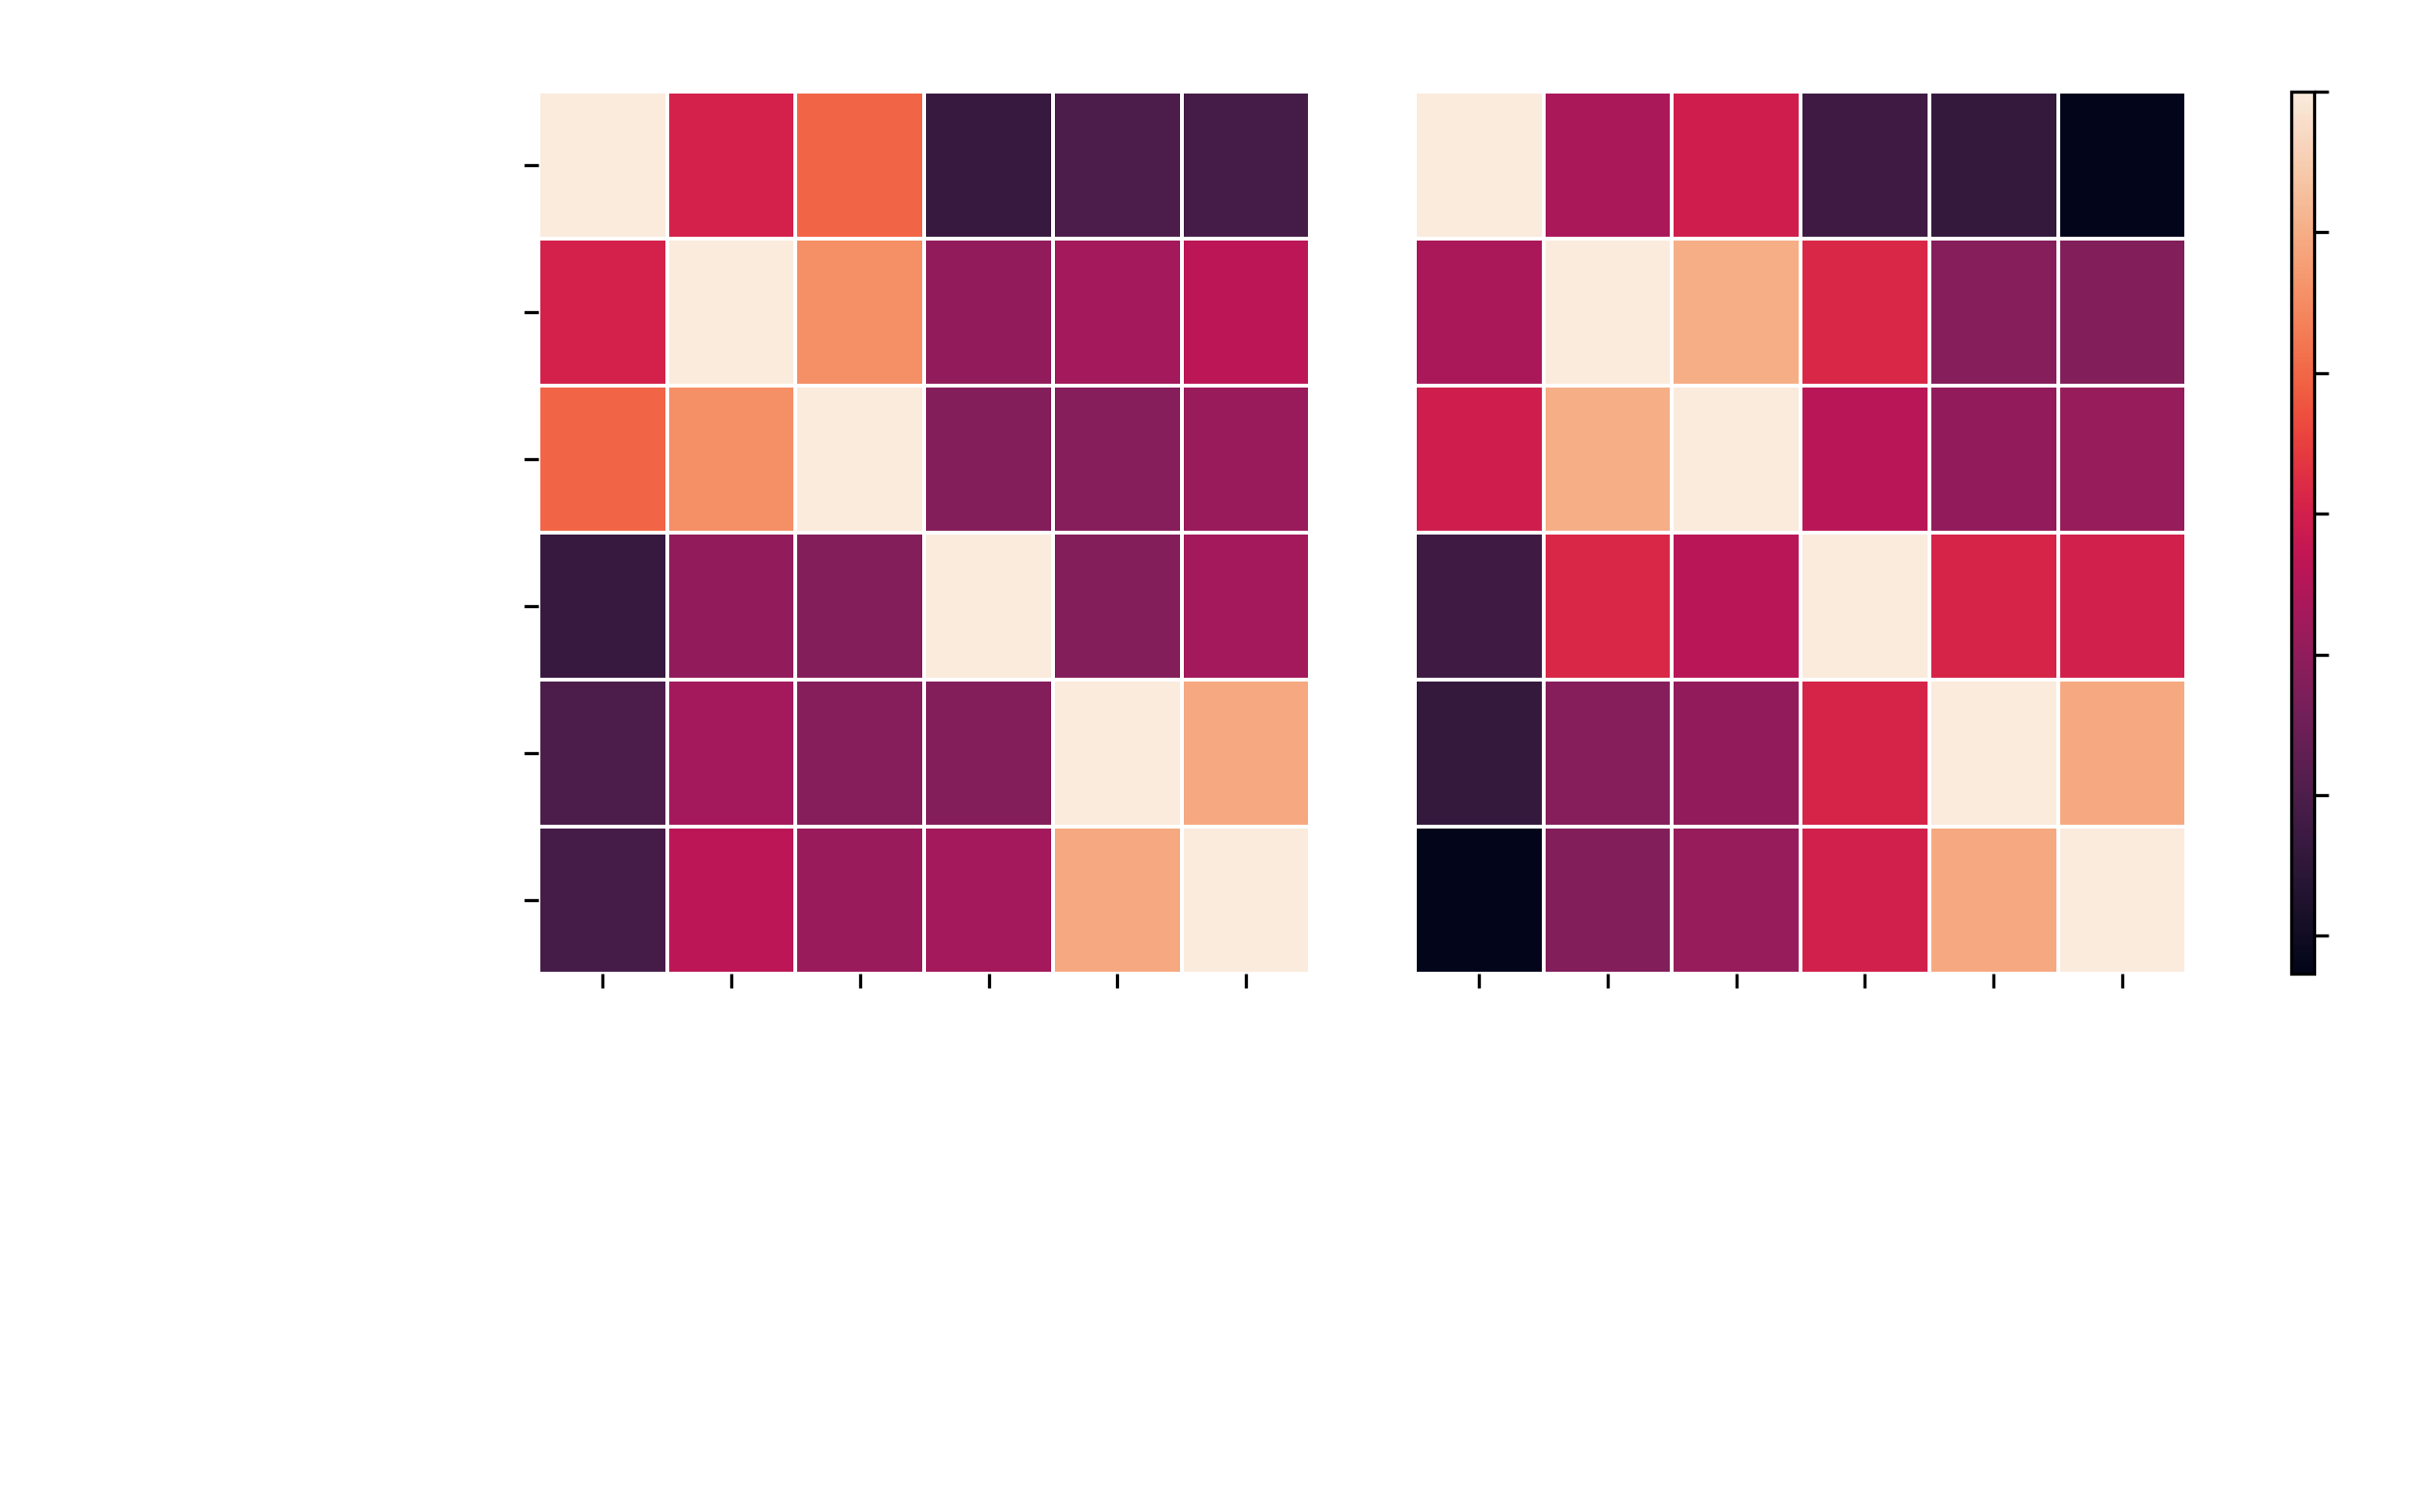

In [36]:
_df1 = ndcg_evals_df.rename(columns=LATEX_MODEL_NAMES).corr(method='pearson', numeric_only=True)
_df2 = rbp_evals_df.rename(columns=LATEX_MODEL_NAMES).corr(method='pearson', numeric_only=True)

vmin = min(_df1.values.min(), _df2.values.min())
vmax = max(_df1.values.max(), _df2.values.max())

# create 2 heatmaps and set their size
fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[1, 1, 0.03]))
fig.set_size_inches(8, 4)

sns.heatmap(_df1, annot=True, cbar=False, ax=axs[0], vmin=vmin, vmax=vmax, square=False, linewidth=.5,
            annot_kws={"size": 12})
# set the title on the left heatmap
axs[0].set_title('Pearson\'s $r$ with NDCG@10')
sns.heatmap(_df2, annot=True, yticklabels=False, cbar=False, ax=axs[1], vmin=vmin, vmax=vmax, square=False,
            linewidth=.5, annot_kws={"size": 12})
# set the title on the right heatmap
axs[1].set_title('Pearson\'s $r$ with RBP(0.8)')

fig.colorbar(axs[1].collections[0], cax=axs[2])
# plt.tight_layout()
plt.savefig('plots/CombinedHeatMapsCorrelation.pdf', bbox_inches='tight', dpi=300)
plt.show()

Pearson:
|                     |   PL2-Terrier |   LambdaMART-LightGBM |   LambdaMART-XGBoost |   GDMTL |   Ranking |   Rating |
|:--------------------|--------------:|----------------------:|---------------------:|--------:|----------:|---------:|
| PL2-Terrier         |          1.00 |                  0.70 |                 0.79 |    0.46 |      0.50 |     0.49 |
| LambdaMART-LightGBM |          0.70 |                  1.00 |                 0.86 |    0.60 |      0.63 |     0.66 |
| LambdaMART-XGBoost  |          0.79 |                  0.86 |                 1.00 |    0.58 |      0.59 |     0.61 |
| GDMTL               |          0.46 |                  0.60 |                 0.58 |    1.00 |      0.58 |     0.63 |
| Ranking             |          0.50 |                  0.63 |                 0.59 |    0.58 |      1.00 |     0.89 |
| Rating              |          0.49 |                  0.66 |                 0.61 |    0.63 |      0.89 |     1.00 |


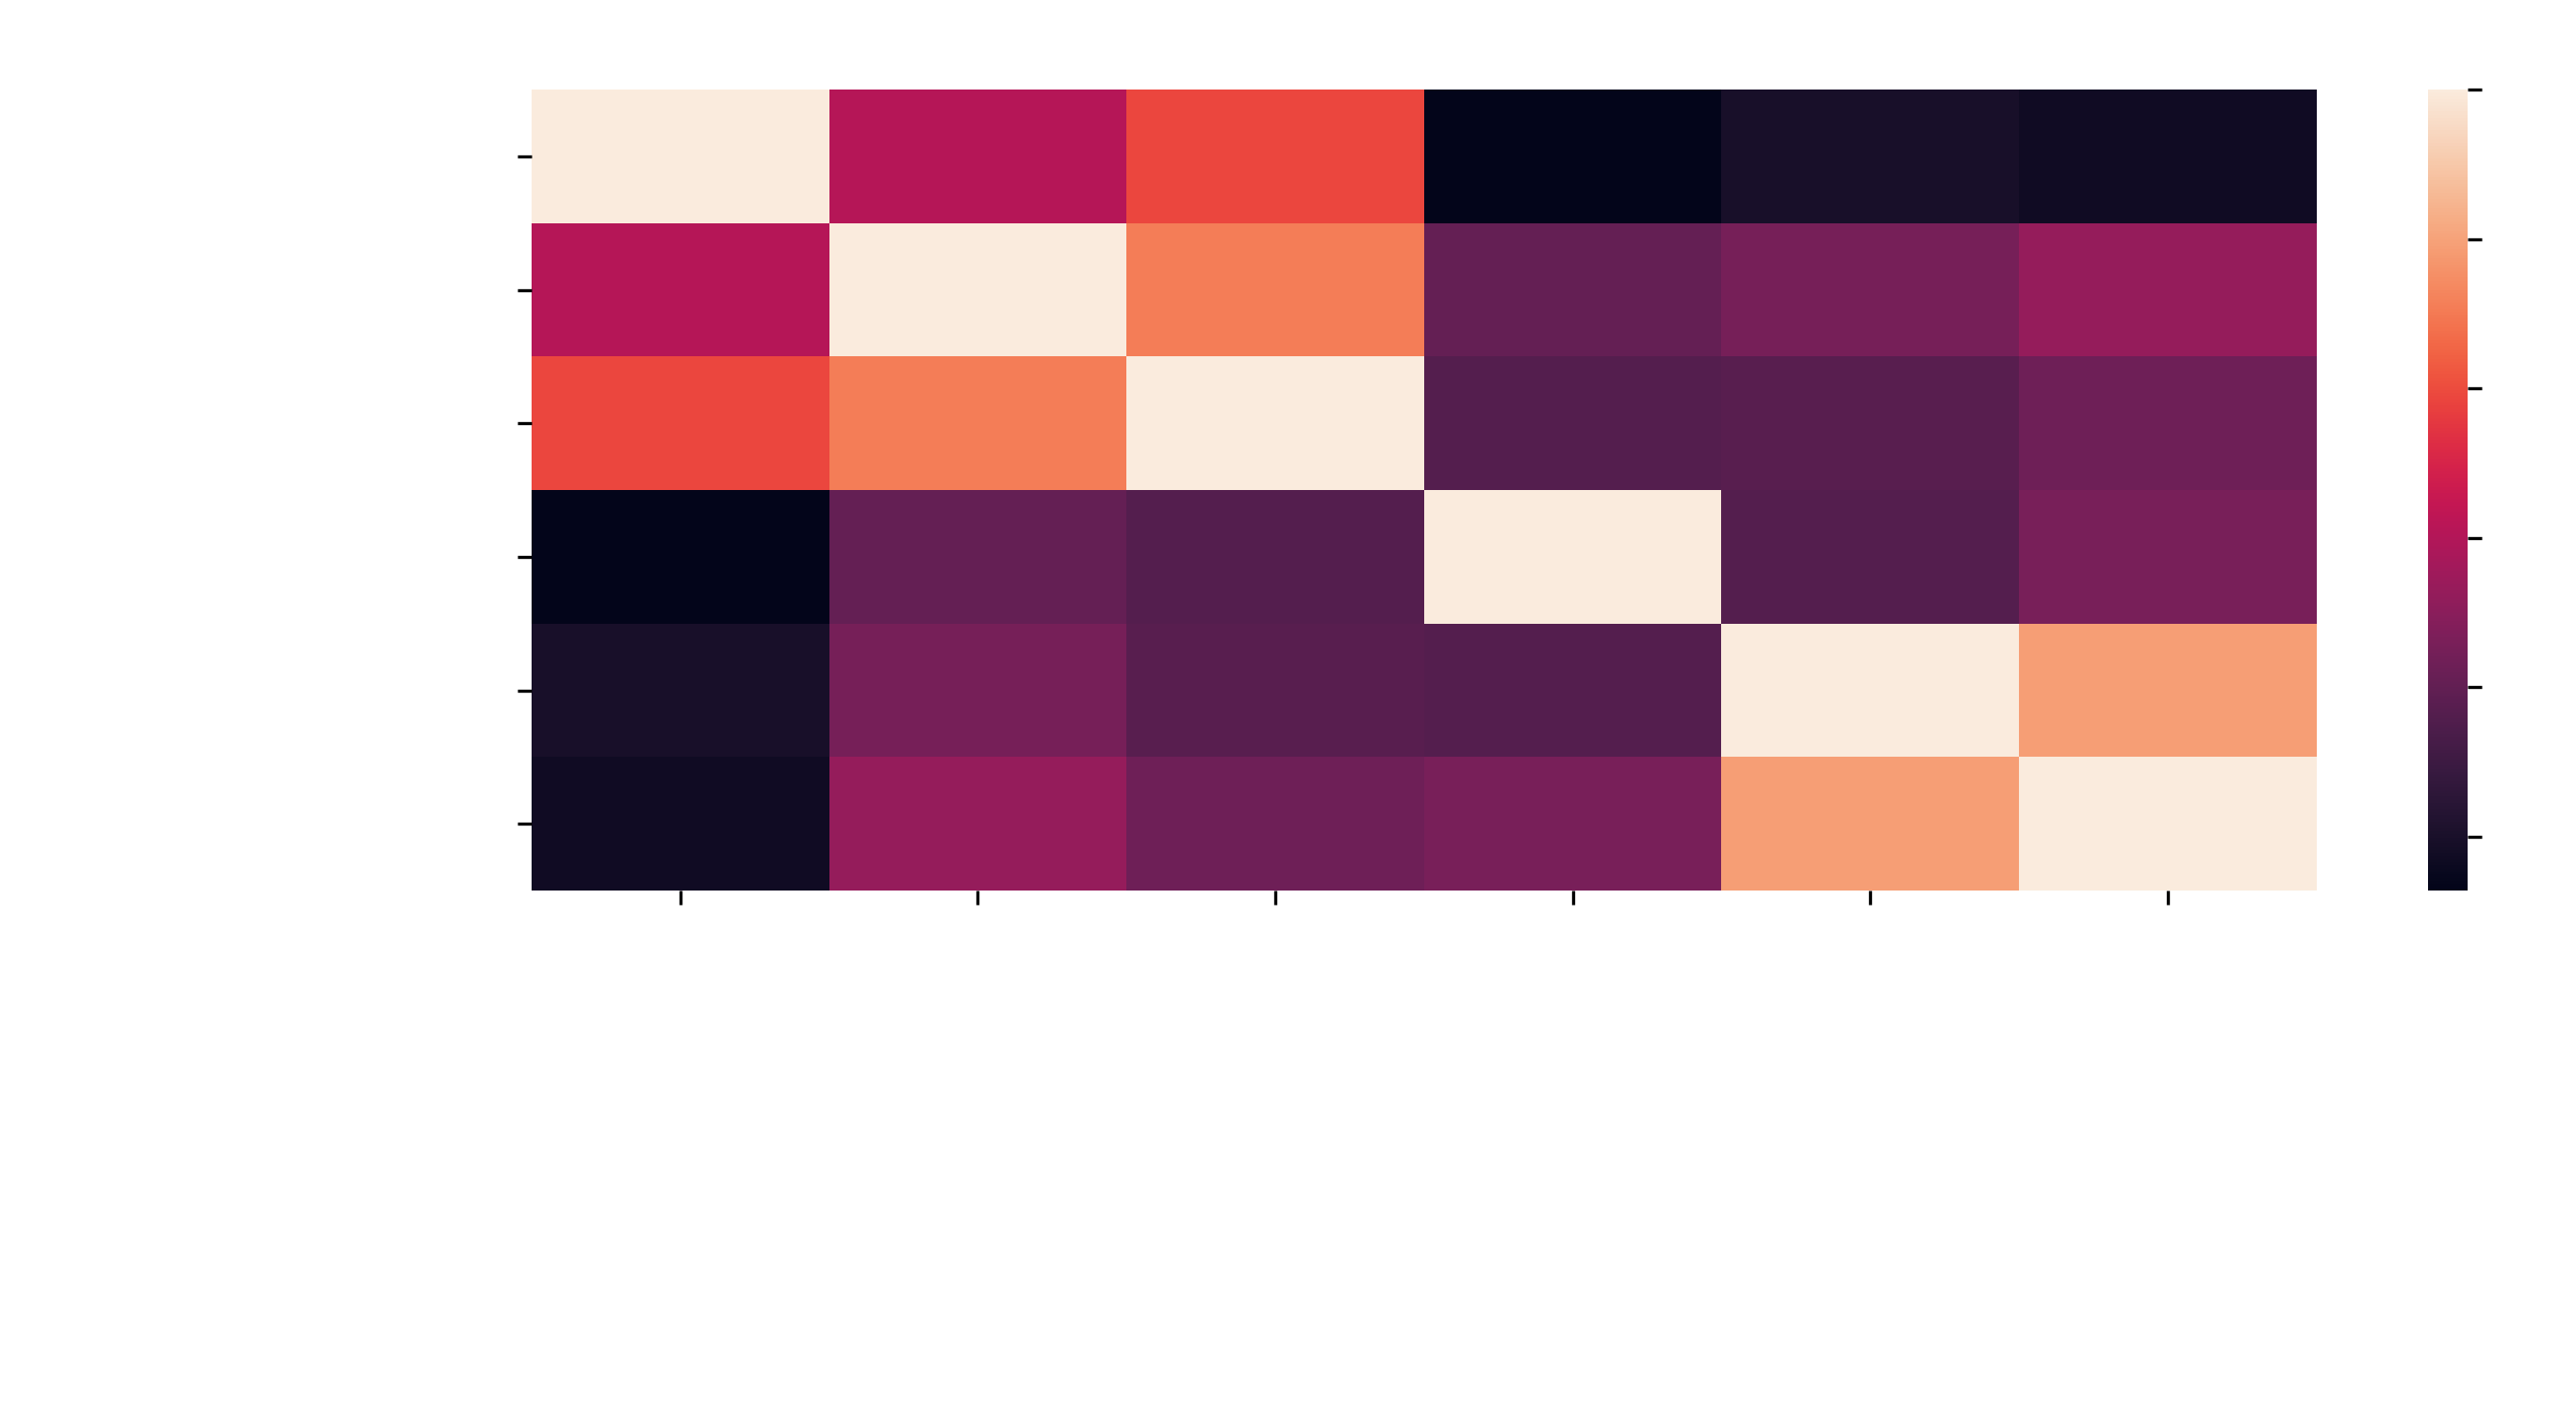

In [30]:
# _df = ndcg_evals_df.merge(std_qpp, left_index=True, right_index=True)

_df = ndcg_evals_df.rename(columns=LATEX_MODEL_NAMES)
print('Pearson:')
print(_df.corr(method='pearson', numeric_only=True).to_markdown(floatfmt='.2f'))
# print(_df.corr(method='pearson', numeric_only=True).to_latex(float_format="%.2f"))
# print('\nSpearman:')
# print(evals_df.corr(method='spearman').to_markdown(floatfmt='.2f'))
# print('\nKendall:')
# print(evals_df.corr(method='kendall').to_markdown(floatfmt='.2f'))
ax = sns.heatmap(data=_df.corr(method='pearson', numeric_only=True), annot=True, fmt=".2f")
plt.tight_layout(h_pad=1.5)
plt.title('NDCG@10 Correlations')
plt.savefig('plots/ndcg@10correlationsHeatmap.pdf')
plt.show()

In [31]:
_df = rbp_evals_df.rename(columns=LATEX_MODEL_NAMES)
print('Pearson:')
print(_df.corr(method='pearson').to_markdown(floatfmt='.2f'))
# print('\nSpearman:')
# print(evals_df.corr(method='spearman').to_markdown(floatfmt='.2f'))
# print('\nKendall:')
# print(evals_df.corr(method='kendall').to_markdown(floatfmt='.2f'))
sns.heatmap(data=_df.corr(method='pearson', numeric_only=True), annot=True, fmt=".2f")
plt.tight_layout(h_pad=1.5)
plt.title('RBP(0.8) Correlations')
plt.savefig('plots/rbp@08correlationsHeatmap.pdf')
plt.show()

Pearson:


ValueError: could not convert string to float: 'sore throat home remedy'

In [ ]:
def plot_metric_per_query(metric_name, eval_df):
    tidy_df = eval_df.swaplevel(axis='columns')[metric_name].stack().reset_index().rename(
        columns={'level_0': 'qid', 'level_1': 'method', 0: metric_name})
    # qid_order = tidy_df.groupby('qid')['ndcg@10'].mean().sort_values().index
    grpd_obj = tidy_df.groupby('qid')[metric_name]
    vars_sr = grpd_obj.var()
    median_sr = grpd_obj.median()
    qid_order = pd.DataFrame(dict(var=vars_sr, median=median_sr)).sort_values(['var', 'median']).index

    g = sns.catplot(data=tidy_df, x='qid', y=metric_name, hue='method', height=3.5, aspect=8, kind='point',
                    order=qid_order,
                    join=False, dodge=True)

    for ax in g.axes.flat:
        ax.minorticks_on()
        ax.tick_params(axis='y', which='minor', left=True)
        ax.tick_params(axis='x', which='minor', bottom=False)
        ax.tick_params(axis='x', which='major', bottom=True, labelbottom=True, labelrotation=50)

    g.map(plt.grid, b=True, which='major', axis='both', color='#E5E5E5', linestyle='-.', zorder=1, linewidth=1, ms=0)
    g.map(plt.grid, b=True, which='minor', axis='y', color='#E5E5E5', linestyle=':', zorder=0, alpha=0.5, linewidth=0.5,
          ms=0)

    plt.tight_layout(h_pad=1.5)
    plt.savefig(f'plots/per_query_comparison_{metric_name}.pdf')
    plt.show()
    _df = tidy_df.pivot(index='qid', columns='method').droplevel(0, axis=1)
    print(_df.idxmax(axis=1).value_counts().rename('# Best Method per Query').to_markdown())

In [ ]:
# plt.figure(figsize=(16,9), dpi=200)
plot_metric_per_query('ndcg@10', ndcg_df)

In [ ]:
plot_metric_per_query('rbp@0.8', rbp_df)